**Analyze the demographics**

Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import requests
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Install Google Drive access

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Set Authorization for Google

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Download the file

In [5]:
fileDownloaded = drive.CreateFile({"id":"1sKrsSPvIGKkjD9EfcA9YszuubTUZGnrf"})

In [6]:
fileDownloaded.GetContentFile("survey_data_demographics.csv")

Read the data

In [7]:
df=pd.read_csv("survey_data_demographics.csv")
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

Extract country information

In [8]:
country_info = df[['Country', 'Respondent']]
country_info

,Country,Respondent
0,United States,4
1,New Zealand,9
2,United States,13
3,United Kingdom,16
4,Australia,17
...,...,...
11393,United States,25136
11394,Poland,25137
11395,United States,25138
11396,Switzerland,25141


Group countries

In [9]:
country_info_unique=country_info.groupby(['Country'],as_index=False).sum()
country_info_unique

,Country,Respondent
0,Afghanistan,33196
1,Albania,172326
2,Algeria,26206
3,Argentina,833965
4,Armenia,148716
...,...,...
130,Uzbekistan,24758
131,"Venezuela, Bolivarian Republic of...",93735
132,Viet Nam,164245
133,Yemen,1129


Extract top 10 countries having the most respondents

In [10]:
top_countries=country_info_unique.sort_values(by='Respondent',axis=0,ascending=False,inplace=False)
top_countries

,Country,Respondent
128,United States,39154240
50,India,11136594
126,United Kingdom,10346562
42,Germany,9395597
20,Canada,5098804
...,...,...
98,Rwanda,3860
74,Mongolia,2067
15,Brunei Darussalam,1764
133,Yemen,1129


In [11]:
top_10_countries = top_countries.head(10)
top_10_countries

,Country,Respondent
128,United States,39154240
50,India,11136594
126,United Kingdom,10346562
42,Germany,9395597
20,Canada,5098804
40,France,4285986
14,Brazil,4182695
5,Australia,3546848
108,Spain,2979174
80,Netherlands,2945481


Plot the number of respondents in top 10 countries

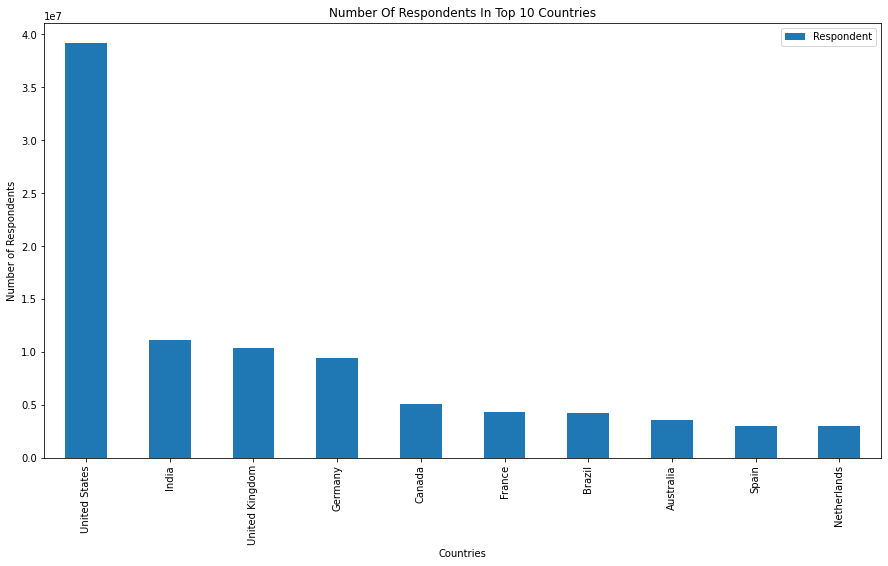

In [12]:
top_10_countries.plot(kind='bar',figsize=(15,8),x="Country",y="Respondent")
plt.title("Number Of Respondents In Top 10 Countries")
plt.xlabel('Countries')
plt.ylabel('Number of Respondents')
plt.show()

Get the education information of respondents

In [13]:
education_stats = df[['Respondent',"UndergradMajor",]]
education_stats

,Respondent,UndergradMajor
0,4,"Computer science, computer engineering, or sof..."
1,9,"Computer science, computer engineering, or sof..."
2,13,"Computer science, computer engineering, or sof..."
3,16,NaN
4,17,"Computer science, computer engineering, or sof..."
...,...,...
11393,25136,"Computer science, computer engineering, or sof..."
11394,25137,"Computer science, computer engineering, or sof..."
11395,25138,"Computer science, computer engineering, or sof..."
11396,25141,NaN


Group the education data 

In [14]:
education_stats_unique=education_stats.groupby(['UndergradMajor'],as_index=False).sum()
education_stats_unique

,UndergradMajor,Respondent
0,"A business discipline (ex. accounting, finance...",3217499
1,"A health science (ex. nursing, pharmacy, radio...",350800
2,"A humanities discipline (ex. literature, histo...",2550087
3,"A natural science (ex. biology, chemistry, phy...",5051069
4,"A social science (ex. anthropology, psychology...",2728728
5,"Another engineering discipline (ex. civil, ele...",10098987
6,"Computer science, computer engineering, or sof...",86536112
7,Fine arts or performing arts (ex. graphic desi...,1980077
8,I never declared a major,1487930
9,"Information systems, information technology, o...",9912101


Sort the education data by respondent in descending order

In [15]:
sorted_education_stats_unique=education_stats_unique.sort_values(ascending=False,axis=0,by="Respondent")
sorted_education_stats_unique

,UndergradMajor,Respondent
6,"Computer science, computer engineering, or sof...",86536112
5,"Another engineering discipline (ex. civil, ele...",10098987
9,"Information systems, information technology, o...",9912101
3,"A natural science (ex. biology, chemistry, phy...",5051069
11,Web development or web design,4940795
10,Mathematics or statistics,4472412
0,"A business discipline (ex. accounting, finance...",3217499
4,"A social science (ex. anthropology, psychology...",2728728
2,"A humanities discipline (ex. literature, histo...",2550087
7,Fine arts or performing arts (ex. graphic desi...,1980077


Plot the education data by bar chart

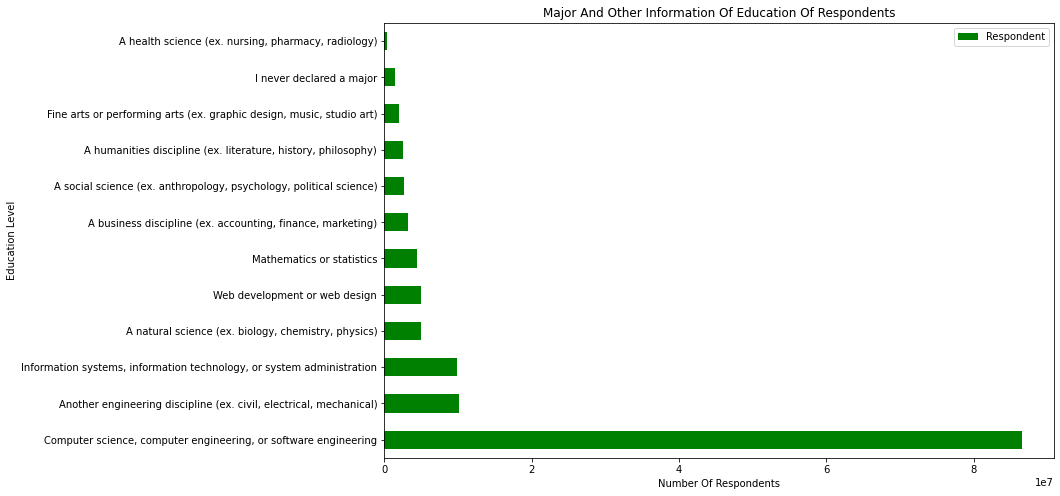

In [16]:
sorted_education_stats_unique.plot(kind='barh',y='Respondent',x='UndergradMajor', figsize=(12,8),color='green')
plt.title("Major And Other Information Of Education Of Respondents")
plt.xlabel('Number Of Respondents')
plt.ylabel('Education Level')
plt.show()

Get information about compensation

In [17]:
compensation_data=df[['ConvertedComp','Country']]
compensation_data

,ConvertedComp,Country
0,61000.0,United States
1,95179.0,New Zealand
2,90000.0,United States
3,455352.0,United Kingdom
4,65277.0,Australia
...,...,...
11393,130000.0,United States
11394,19880.0,Poland
11395,105000.0,United States
11396,80371.0,Switzerland


Group the compensation data 

In [18]:
compensation_data_grouped=compensation_data.groupby(by='Country',axis=0,as_index=False).mean()
compensation_data_grouped

,Country,ConvertedComp
0,Afghanistan,5988.000000
1,Albania,17719.818182
2,Algeria,12536.000000
3,Argentina,35392.835821
4,Armenia,25782.000000
...,...,...
130,Uzbekistan,68000.000000
131,"Venezuela, Bolivarian Republic of...",15900.000000
132,Viet Nam,12785.083333
133,Yemen,14376.000000


Sort compensation data 

In [19]:
compensation_data_sorted=compensation_data_grouped.sort_values(by="ConvertedComp",axis=0,ascending=False)
compensation_data_sorted

,Country,ConvertedComp
61,Kuwait,930612.000000
66,Liechtenstein,811188.000000
111,Swaziland,321076.666667
54,Ireland,278423.516129
128,United States,252944.191093
...,...,...
110,Sudan,1764.000000
114,Syrian Arab Republic,1692.000000
21,Cape Verde,NaN
77,Mozambique,NaN


List only the top 15 countries

In [20]:
top15_countries_salary=compensation_data_sorted.head(15)
top15_countries_salary

,Country,ConvertedComp
61,Kuwait,930612.000000
66,Liechtenstein,811188.000000
111,Swaziland,321076.666667
54,Ireland,278423.516129
128,United States,252944.191093
118,Timor-Leste,229500.000000
68,Luxembourg,227522.700000
113,Switzerland,191666.225352
84,Norway,184921.455696
126,United Kingdom,162861.725992


Plot compensation data by area chart

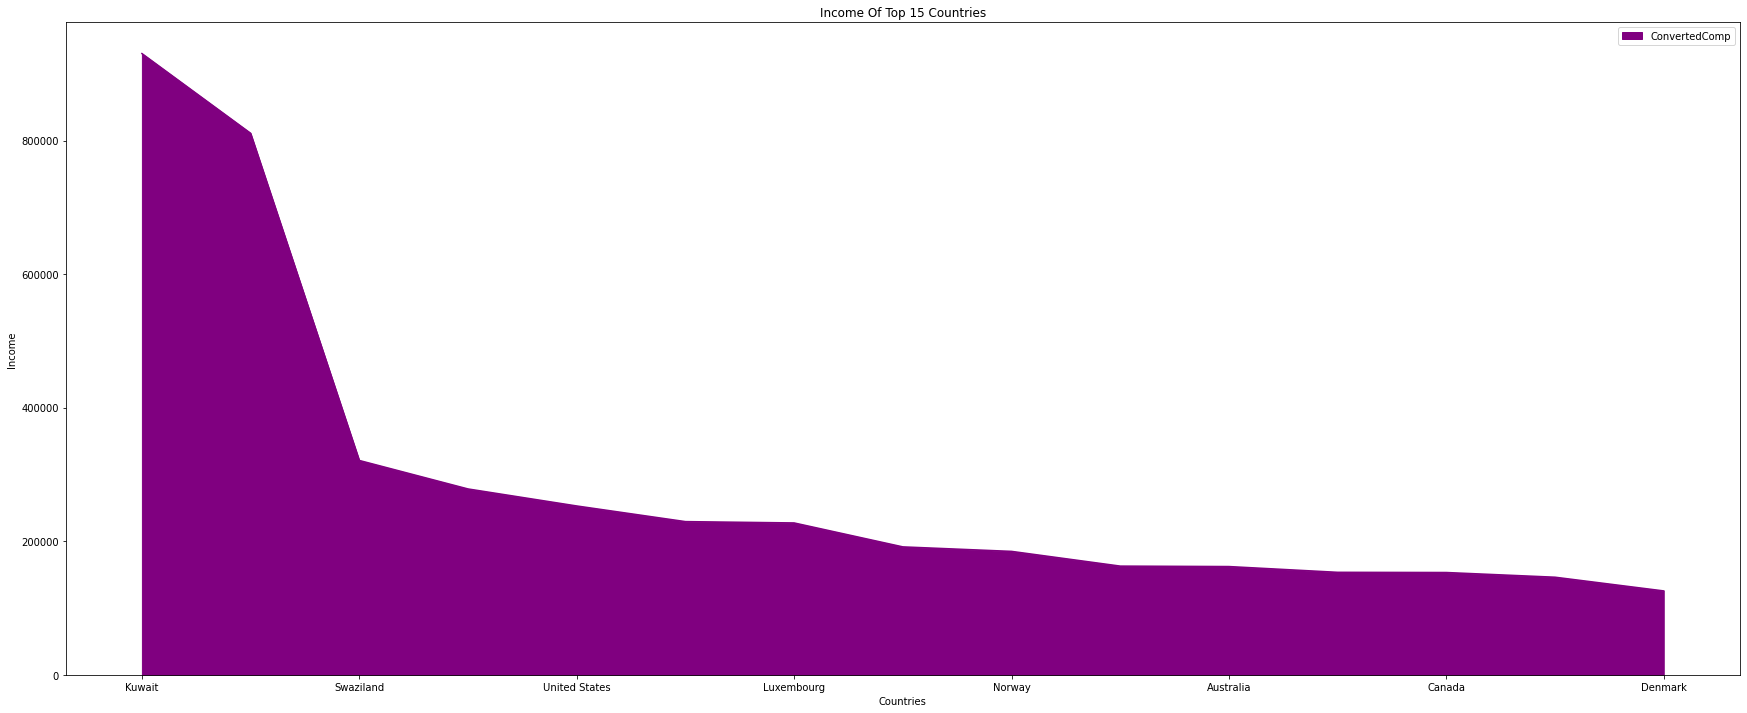

In [21]:
top15_countries_salary.plot(kind='area', y='ConvertedComp',x='Country', color='purple', figsize=(30,12))
plt.title('Income Of Top 15 Countries')
plt.xlabel('Countries')
plt.ylabel('Income')
plt.show()

Get social media data

In [22]:
social_media_data=df[['SocialMedia','Respondent']]
social_media_data

,SocialMedia,Respondent
0,Reddit,4
1,Twitter,9
2,Twitter,13
3,YouTube,16
4,YouTube,17
...,...,...
11393,Reddit,25136
11394,YouTube,25137
11395,I don't use social media,25138
11396,Reddit,25141


In [23]:
social_media_data_grouped=social_media_data.groupby(by='SocialMedia',axis=0,as_index=False).sum()
social_media_data_grouped

,SocialMedia,Respondent
0,Facebook,21782320
1,Hello,12729
2,I don't use social media,6978995
3,Instagram,10333041
4,LinkedIn,6302094
5,Reddit,28628054
6,Snapchat,714052
7,Twitter,20794647
8,VK ВКонта́кте,760560
9,WeChat 微信,1069535


Sort social media data in descending order

In [24]:
social_media_data_sorted=social_media_data_grouped.sort_values(by="Respondent",axis=0,ascending=False)
social_media_data_sorted

,SocialMedia,Respondent
5,Reddit,28628054
11,WhatsApp,22269980
0,Facebook,21782320
7,Twitter,20794647
12,YouTube,18939411
3,Instagram,10333041
2,I don't use social media,6978995
4,LinkedIn,6302094
9,WeChat 微信,1069535
8,VK ВКонта́кте,760560


List only 6 of the most popular social media data

In [25]:
top_6_social_media = social_media_data_sorted.head(6)
top_6_social_media

,SocialMedia,Respondent
5,Reddit,28628054
11,WhatsApp,22269980
0,Facebook,21782320
7,Twitter,20794647
12,YouTube,18939411
3,Instagram,10333041


Plot the distribution of these 6 social media data

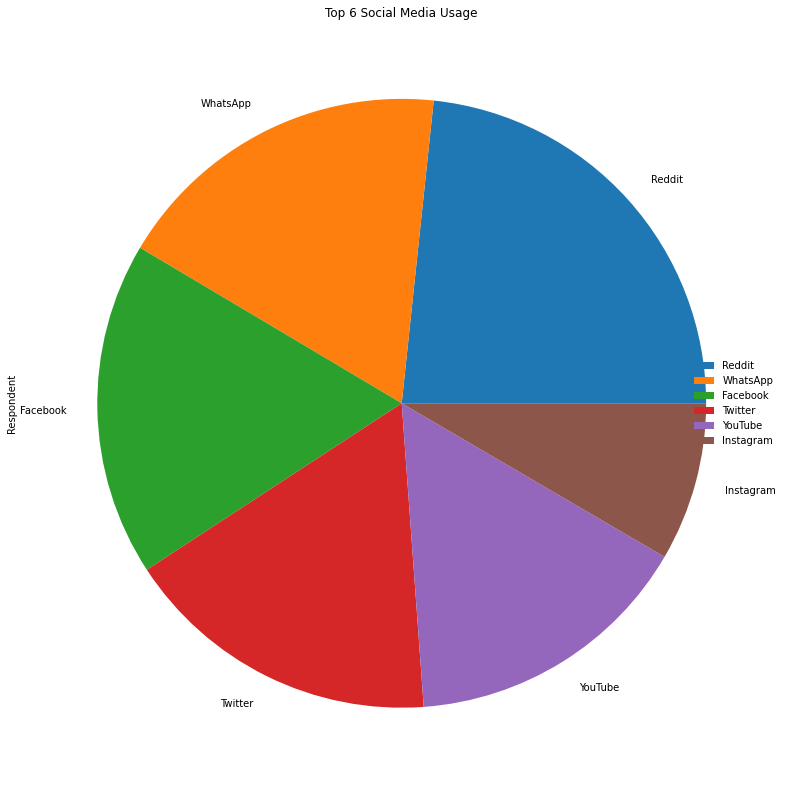

In [26]:
labels=['Reddit','WhatsApp','Facebook','Twitter','YouTube','Instagram']
top_6_social_media.plot(kind='pie',x="SocialMedia",y="Respondent",labels=labels,figsize=(18,14))
plt.title('Top 6 Social Media Usage')
plt.legend(loc='right', frameon=False)
plt.show()